<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173_Fall2025/blob/main/F25_Class_06_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 6: Reinforcement Learning**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* Part 6.1: Introduction to Introduction to Gymnasium and Q-Learning
* **Part 6.2: Stable Baselines Q-Learning**
* Part 6.3: Atari Games with Stable Baselines Neural Networks
* Part 6.4: Future of Reinforcement Learning


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Note: using Google CoLab


Make sure your GMAIL address is included as the last line in the output above.

### Install Gymnasium

Before we can beging, we need to install Hugging Face datasets by running the code in the next cell.

In [ ]:
# Install gymnasium

# Install stable-baselines
!pip install stable-baselines3[extra] gymnasium > /dev/null

# Install gymnasium[atari] package
!pip install gymnasium[atari] > /dev/null

# Install pyvirtualdisplay
!pip install pyvirtualdisplay > /dev/null

# Set a non-interactive frontend for debconf and install xvfb and ffmpeg
!sudo DEBIAN_FRONTEND=noninteractive apt-get install -y xvfb ffmpeg > /dev/null


### Install Custom Functions

Run the cell below to load custom functions used in this lesson.

In [ ]:
# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

# **The Cartpole Enviroment**

The **CartPole environment** is a classic benchmark problem in the field of reinforcement learning (RL) and control theory. It simulates the task of balancing a pole on a cart that can move horizontally along a track. The environment is commonly used to test and evaluate the performance of various RL algorithms.

### **Key Aspects of the CartPole Environment**

**Objective**

The goal of the agent (the controller) is to keep the pole balanced upright by applying forces to move the cart left or right. The agent receives rewards based on its ability to keep the pole balanced for as long as possible.

**State Space**

The state space of the CartPole environment typically includes four variables:

1. **Cart Position:** The horizontal position of the cart on the track.
2. **Cart Velocity:** The velocity of the cart.
3. **Pole Angle:** The angle of the pole relative to the vertical position.
4. **Pole Angular Velocity:** The rate at which the pole's angle is changing.

**Action Space**

The action space consists of two discrete actions:

1. **Move Cart Left:** Apply a force to the cart to move it to the left.
2. **Move Cart Right:** Apply a force to the cart to move it to the right.

**Rewards**

The agent receives a positive reward for every time step that the pole remains balanced. The episode ends when the pole falls over (i.e., the angle exceeds a certain threshold), the cart moves too far to the left or right, or a maximum number of time steps is reached.

**Termination Conditions**

The episode terminates if:
* The pole's angle exceeds a certain threshold (e.g., ±12 degrees).
* The cart's position exceeds a certain range (e.g., ±2.4 units from the center).
* The maximum number of time steps is reached.

In the Cartpole environment:

-   `observation` is an array of 4 floats:
    -   the position and velocity of the cart
    -   the angular position and velocity of the pole
-   `reward` is a scalar float value
-   `action` is a scalar integer with only two possible values:
    -   `0` — "move left"
    -   `1` — "move right"


In [ ]:
#

import gymnasium as gym

# Create and initialize the MountainCar environment
env = gym.make('CartPole-v1', render_mode="rgb_array")

time_step = env.reset()
print('Time step:')
print(time_step)

action = 1

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)


Time step:
(array([-0.03845299,  0.03778032, -0.00355858,  0.01052895], dtype=float32), {})
Next time step:
(array([-0.03769738,  0.23295313, -0.003348  , -0.28327462], dtype=float32), 1.0, False, False, {})


We can also visualize this environment

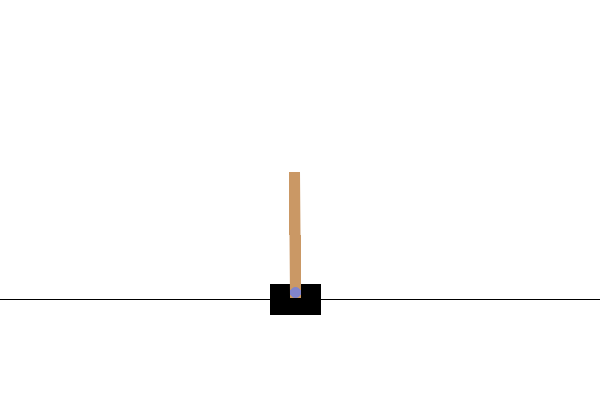

In [ ]:
from PIL import Image

# Render the environment's state to a numpy array
frame = env.render()

# Convert the numpy array to an image and display it
image = Image.fromarray(frame)

# Don't forget to close the environment when you're done!
env.close()

display(image)


The goal is to move the above cart without causing the pole to fall over.

## Training the agent

We will make use of Stable-Baselines3 to train an agent for this environment. We will make use of the MlpPolicy, which makes use of a Multi-Layer Peceptron (MLP), which is another name for neural network.

In [ ]:
# Updated Code

import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Create the CartPole environment
env = make_vec_env('CartPole-v1', n_envs=1)

# Instantiate the agent
model = PPO('MlpPolicy', env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the agent
model.save("ppo_cartpole")

# Create a fresh environment for evaluation and wrap it with Monitor
eval_env = Monitor(gym.make('CartPole-v1'))

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10)

print(f"Mean reward: {mean_reward} +/- {std_reward}")


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.4     |
|    ep_rew_mean     | 21.4     |
| time/              |          |
|    fps             | 846      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 26.5        |
|    ep_rew_mean          | 26.5        |
| time/                   |             |
|    fps                  | 687         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008167893 |
|    clip_fraction        | 0.0753      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.687      |
|    explained_variance   | -0.00472    |
|    learning

## **Videos**

We can easily visulaize the cart pole ageint in a video.

In [ ]:
# Original code

from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
import base64
from IPython import display as ipythondisplay
from pathlib import Path

# Record the agent playing
video_folder = '/videos'
video_length = 1500

env = make_vec_env('CartPole-v1', n_envs=1)
env = VecVideoRecorder(env, video_folder,
                       record_video_trigger=lambda x: x == 0, video_length=video_length,
                       name_prefix="ppo-cartpole")

obs = env.reset()
for _ in range(video_length):
    action, _ = model.predict(obs, deterministic=True)
    obs, _, _, _ = env.step(action)

# Close the environment and video recorder
env.close()

# Display the video
video_path = Path(video_folder) / "ppo-cartpole-step-0-to-step-1500.mp4"
video = open(video_path, "rb").read()
encoded = base64.b64encode(video)

ipythondisplay.display(ipythondisplay.HTML(data=f'<video alt="test" autoplay loop controls style="height: 400px;">'
                                        f'<source src="data:video/mp4;base64,{encoded.decode()}" type="video/mp4" />'
                                        f'</video>'))


Saving video to /videos/ppo-cartpole-step-0-to-step-1500.mp4


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


Moviepy - Building video /videos/ppo-cartpole-step-0-to-step-1500.mp4.
Moviepy - Writing video /videos/ppo-cartpole-step-0-to-step-1500.mp4



Moviepy - Done !
Moviepy - video ready /videos/ppo-cartpole-step-0-to-step-1500.mp4


## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Copy of Class_06_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **IBM PC/AT**

![__](https://upload.wikimedia.org/wikipedia/commons/6/69/IBM_PC_AT.jpg)


The IBM Personal Computer AT (model 5170, abbreviated as IBM AT or PC/AT) was released in 1984 as the fourth model in the IBM Personal Computer line, following the IBM PC/XT and its IBM Portable PC variant. It was designed around the Intel 80286 microprocessor.

**Name**

IBM did not specify an expanded form of AT on the machine, press releases, brochures or documentation, but some sources expand the term as Advanced Technology, including at least one internal IBM document.

**History**

IBM's 1984 introduction of the AT was seen as an unusual move for the company, which typically waited for competitors to release new products before producing its own models. At $4,000–6,000, it was only slightly more expensive than considerably slower IBM models. The announcement surprised rival executives, who admitted that matching IBM's prices would be difficult. No major competitor showed a comparable computer at COMDEX Las Vegas that year.

The AT is IBM PC compatible, with the most significant difference being a move to the 80286 processor from the 8088 processor of prior models. Like the IBM PC, the AT supported an optional math co-processor chip, the Intel 80287, for faster execution of floating point operations.

In addition, it introduced the AT bus, later known as the ISA bus, a 16-bit bus with backward compatibility with 8-bit PC-compatible expansion cards. The bus also offered fifteen IRQs and seven DMA channels, expanded from eight IRQs and four DMA channels for the PC, achieved by adding another 8259A IRQ controller and another 8237A DMA controller. Some IRQ and DMA channels are used by the motherboard and not exposed on the expansion bus. Both dual IRQ and DMA chipsets are cascading which shares the primary pair. In addition to these chipsets, Intel 82284 Clock Driver and Ready Interface and Intel 82288 Bus Controller are to support the microprocessor.

PC DOS 3.0 was included with support for the new AT features, including preliminary kernel support for networking (which was fully supported in a later version 3.x release).

The motherboard includes a battery-backed real-time clock (RTC) using the Motorola MC146818. This was an improvement from the PC, which required setting the clock manually or installing an RTC expansion card. The RTC also included a 1024 Hz timer (on IRQ 8), a much finer resolution than the 18 Hz timer on the PC.

In addition to keeping the time, the RTC includes 50 bytes of CMOS memory which is used to store software-adjustable BIOS parameters. A disk-based BIOS setup program which saved to this memory took the place of the DIP switches used to set system settings on PCs. Most AT clones have the setup program in ROM rather than on disk.

**Storage**

The standard floppy drive was upgraded to a 1.2 MB 5+1⁄4 inch floppy disk drive (15 sectors of 512 bytes, 80 tracks, two sides), which stored over three times as much data as the 360 KB PC floppy disk, but had compatibility problems with 360k disks (see Problems below). 3+1⁄2 inch floppy drives became available in later ATs.

A 20 MB hard disk drive was included as standard. Early drives were manufactured by Computer Memories and were found to be very unreliable.

**Peripherals**

The AT included the AT keyboard, initially a new 84-key layout (the 84th key being SysRq). The numerical keypad was now clearly separated from the main key group, and indicator LEDs were added for Caps Lock, Scroll Lock and Num Lock. The AT keyboard uses the same 5-pin DIN connector as the PC keyboard, but a different, bidirectional electrical interface with different keyboard scan codes. The bidirectional interface allows the computer to set the LED indicators on the keyboard, reset the keyboard, set the typematic rate, and other features. Later ATs included 101-key keyboards, e.g. the Model M keyboard.

The AT is also equipped with a physical lock that prevents access to the computer by disabling the keyboard and holding the system unit's cover in place.

ATs could be equipped with CGA, MDA, EGA, or PGA video cards.

The 8250 UART from the PC was upgraded to the 16450, but since both chips had single-byte buffers, high-speed serial communication was problematic as with the XT.